In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

/tmp/ipykernel_280/2800906217.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(x - 1) ** 2 / (2 * var)) * \
/tmp/ipykernel_280/2800906217.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(x - 1) ** 2 / (2 * var)) * \
/tmp/ipykernel_280/2800906217.py:6: RuntimeWarning: invalid value encountered in double_scalars
  np.log2(2 / (1 + np.exp(-2 * x / var)))
/tmp/ipykernel_280/2800906217.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  np.log2(2 / (1 + np.exp(-2 * x / var)))
/tmp/ipykernel_280/2800906217.py:6: RuntimeWarning: divide by zero encountered in log2
  np.log2(2 / (1 + np.exp(-2 * x / var)))
/tmp/ipykernel_280/2800906217.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  binary_awgn_capacity_list = [qua

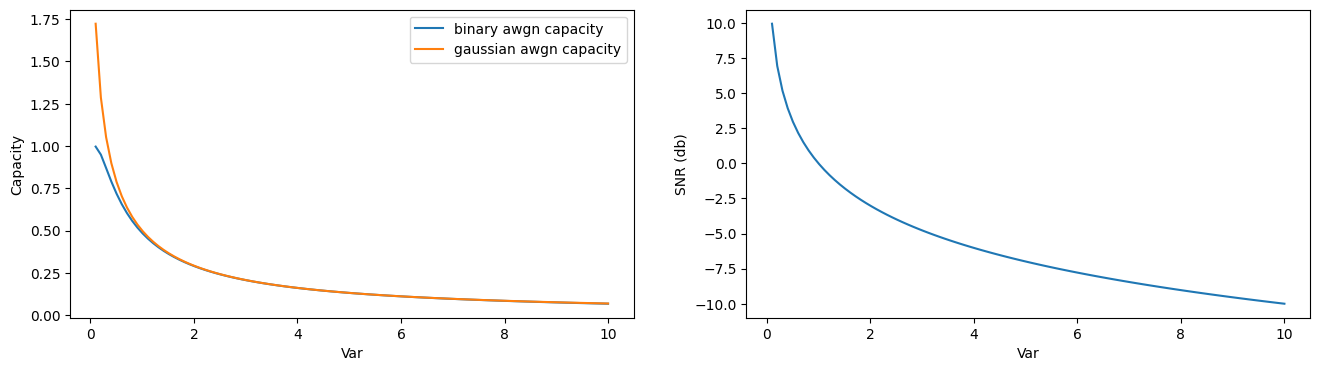

In [25]:
plt.rcParams["figure.figsize"] = (16, 4)


def binary_awgn(x, var):
    return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(x - 1) ** 2 / (2 * var)) * \
        np.log2(2 / (1 + np.exp(-2 * x / var)))

def gaussian_awgn(var):
    return 0.5 * np.log2(1 + 1 / var)

def snr_db(var):
    return 10 * np.log10(1 / var)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlabel("Var")
ax1.set_ylabel("Capacity")
ax2.set_xlabel("Var")
ax2.set_ylabel("SNR (db)")

var_min, var_max = 0, 10
n_points = 100
var_list = np.linspace(var_min, var_max, num=n_points)
binary_awgn_capacity_list = [quad(binary_awgn, -10, 10, args=(v))[0] for v in var_list]
gaussian_awgn_capacity_list = [gaussian_awgn(v) for v in var_list]
snr_db_list = [snr_db(v) for v in var_list]

ax1.plot(var_list, binary_awgn_capacity_list, label="binary awgn capacity")
ax1.plot(var_list, gaussian_awgn_capacity_list, label="gaussian awgn capacity")
ax2.plot(var_list, snr_db_list)


ax1.legend(loc='upper right')
plt.show()